# Community Detection on Youtube and Twitch

In [11]:
import snap
import numpy as np 
from matplotlib import pyplot as plt
import networkx as nx
# !pip3 install python-louvain
import pandas as pd
import networkx as nx
import community
import matplotlib.colors as mcolors

In [18]:
# # TODO : use networkx to read dataset normally like in the hw 
# # instead of using pandas its running slow as ds is big

G = nx.read_edgelist("Dataset/twitch.txt", nodetype = int, delimiter=",",create_using=nx.DiGraph())
G.name = 'Youtube User-User Network'
print(nx.info(G))
# position = nx.spring_layout(G)
# plt.figure(figsize=(24,16))
# nx.draw_networkx(G, 
#                  position, 
#                  with_labels=True, 
#                  font_weight='normal', 
#                  node_size=1000,
#                  arrows=True,
#                  node_color='pink',
#                  font_color='blue',
#                  edge_color='blue')
# plt.title(G.name, size=30)
# plt.axis('off')
# plt.show()

Name: Youtube User-User Network
Type: DiGraph
Number of nodes: 7126
Number of edges: 35324
Average in degree:   4.9571
Average out degree:   4.9571


In [14]:
# # 'Degree Centrality'
# def graph_drawing(graph_database, position, algorithm, algorithm_name):
#     plt.figure(figsize=(24,16))
#     nx.draw_networkx(graph_database, 
#                      position, 
#                      node_size=1000, 
#                      with_labels=True,
#                      font_weight='normal',
#                      cmap=plt.get_cmap('cool'), 
#                      arrows=True,
#                      edge_color='gray',
#                      node_color=list(algorithm.values()),
#                      nodelist=list(algorithm.keys()))
#     plt.title(algorithm_name, size=30)
#     plt.axis('off')
#     plt.show()
    
# graph_drawing(G, position, nx.degree_centrality(G), 'Degree Centrality')



In [15]:
# # 'Betweenness Centrality'
# graph_drawing(G_small, position, nx.betweenness_centrality(G_small), 'Betweenness Centrality')

In [ ]:
# graph_drawing(G_small, position, nx.closeness_centrality(G_small), 'Closeness Centrality')

In [16]:
# partition = community.best_partition(G_small, random_state=1992)
# values = [partition.get(node) for node in G_small.nodes()]
# plt.figure(figsize=(24,16))
# nx.draw_networkx(G_small,
#                  position,
#                  cmap=plt.get_cmap('hsv'),
#                  arrows=True,
#                  node_color=values, 
#                  edge_color='white',
#                  node_size=1000, 
#                  with_labels=True, 
#                  font_weight='normal')
# plt.title('Community Detection', size=30)
# plt.axis('off')
# plt.show()

In [ ]:
# newww

In [42]:
lst = list(G.edges(0))
print(lst)
# lst[0]
# print(G.edges(1))
# inside = lst[0]
# inside[1]

[(0, 82)]


Name: Youtube User-User Network
Type: Graph
Number of nodes: 3176
Number of edges: 11249
Average degree:   7.0838


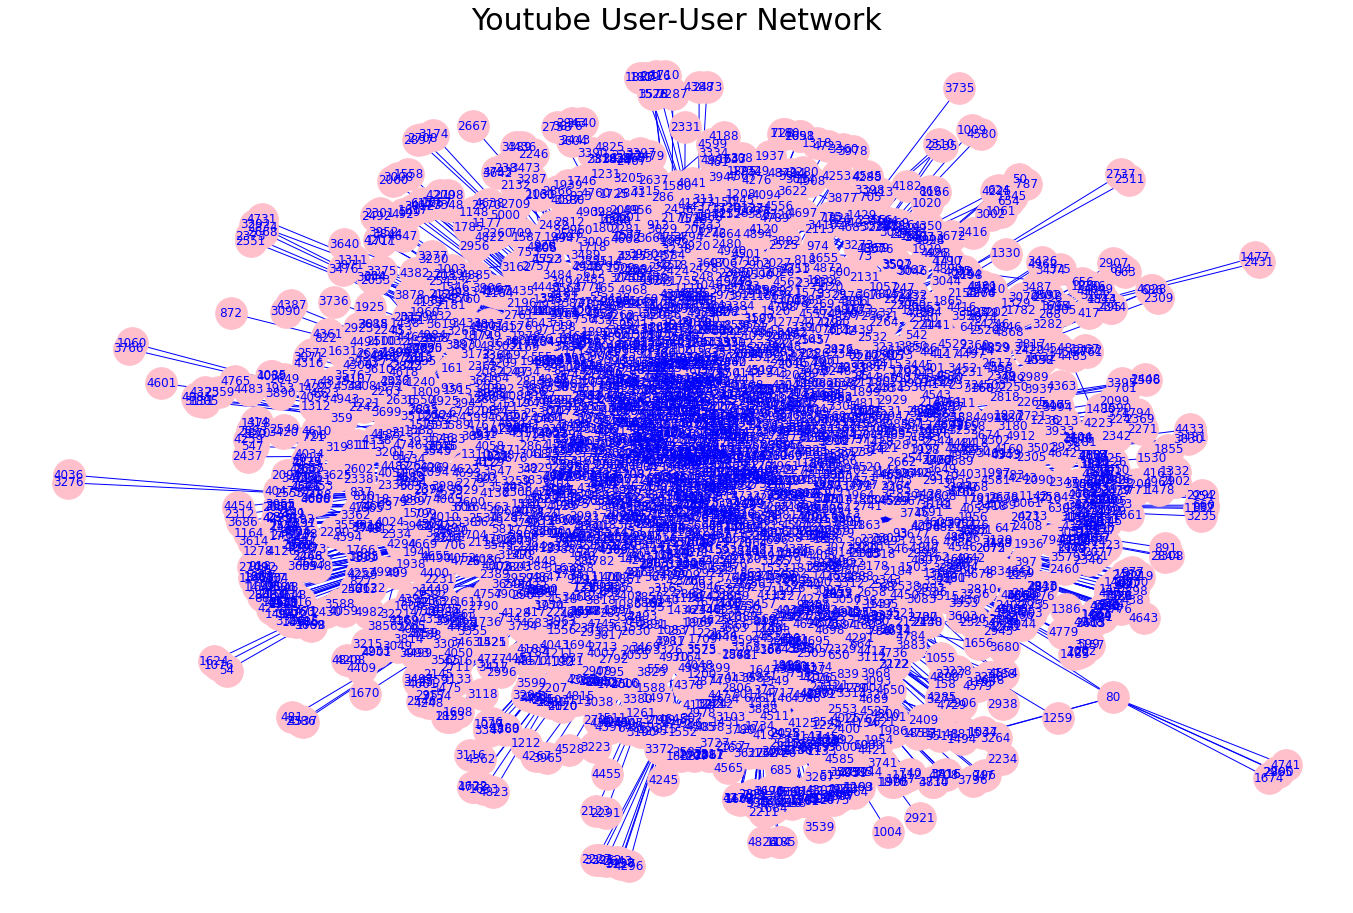

In [73]:
# Get only 1000 nodes and its edges
edgeList=[]
for node in range(5001):
    for i in G.edges(node):
        if i[0] < 5001 and i[1] < 5001:
            if len(G.edges(node)) > 10:
                edgeList.append(i)

newGraph = nx.Graph()
newGraph.add_edges_from(edgeList)
newGraph.name = 'Youtube User-User Network'
newGraph.remove_nodes_from(nx.isolates(newGraph))
print(nx.info(newGraph))
position = nx.spring_layout(newGraph)
plt.figure(figsize=(24,16))
nx.draw_networkx(newGraph, 
                 position, 
                 with_labels=True, 
                 font_weight='normal', 
                 node_size=1000,
                 arrows=True,
                 node_color='pink',
                 font_color='blue',
                 edge_color='blue')
plt.title(newGraph.name, size=30)
plt.axis('off')
plt.show()

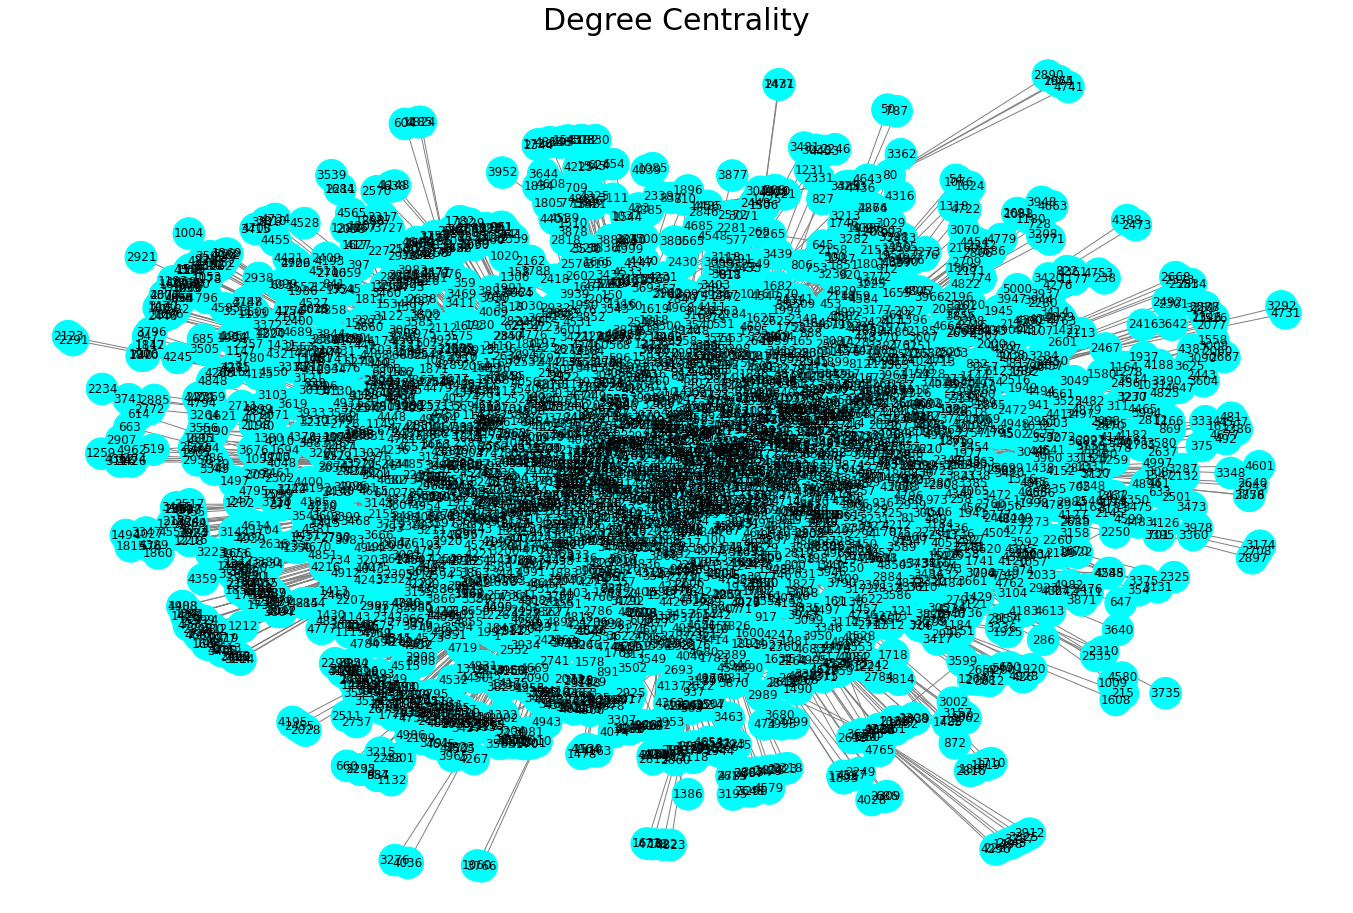

In [66]:
# 'Degree Centrality'
def graph_drawing(graph_database, position, algorithm, algorithm_name):
    plt.figure(figsize=(24,16))
    nx.draw_networkx(graph_database, 
                     position, 
                     node_size=1000, 
                     with_labels=True,
                     font_weight='normal',
                     cmap=plt.get_cmap('cool'), 
                     arrows=True,
                     edge_color='gray',
                     node_color=list(algorithm.values()),
                     nodelist=list(algorithm.keys()))
    plt.title(algorithm_name, size=30)
    plt.axis('off')
    plt.show()
    
graph_drawing(newGraph, position, nx.degree_centrality(newGraph), 'Degree Centrality')




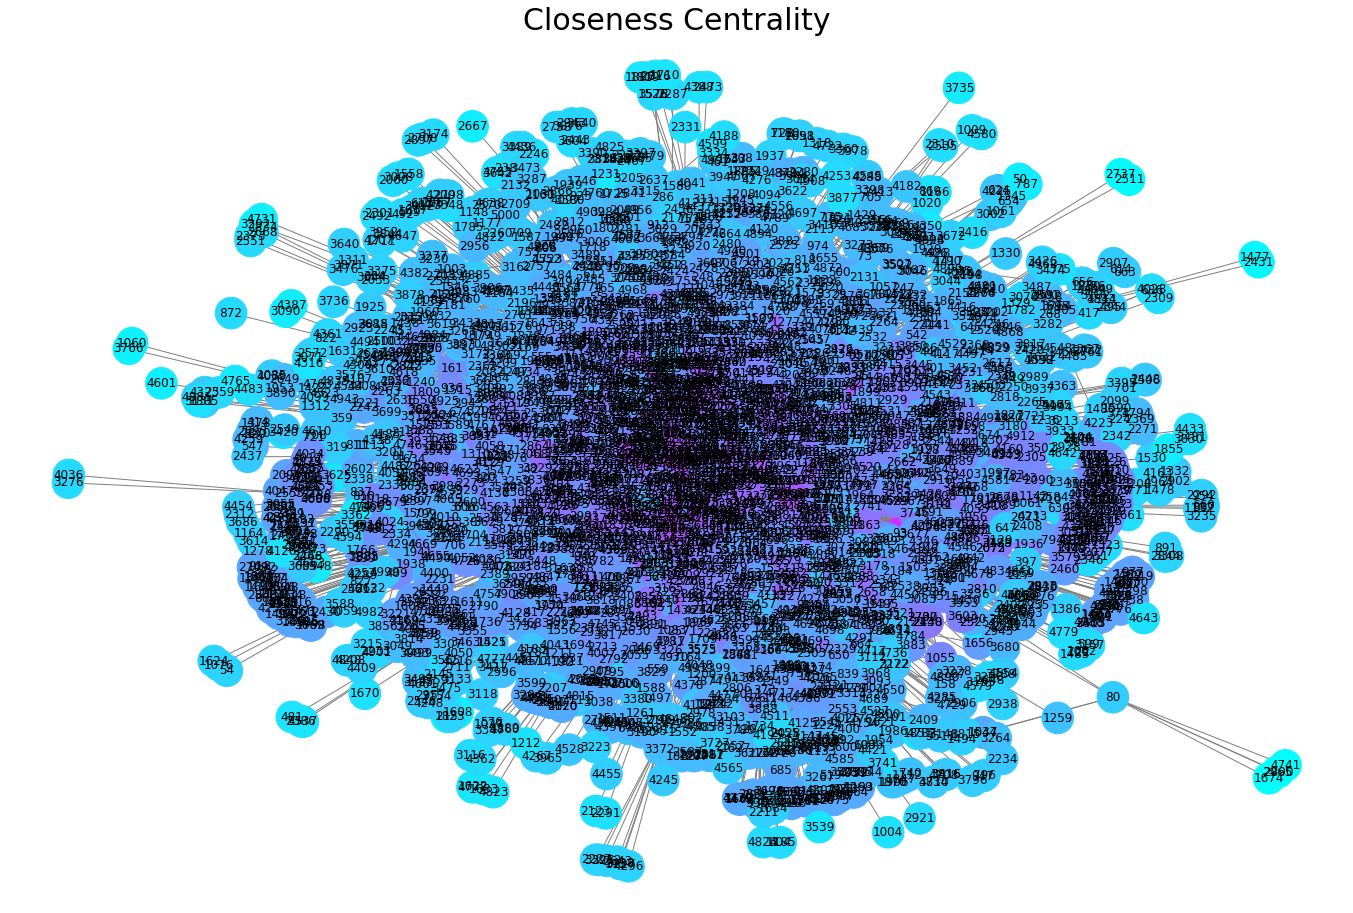

In [75]:
graph_drawing(newGraph, position, nx.closeness_centrality(newGraph), 'Closeness Centrality')

In [77]:
# 'Betweenness Centrality'
graph_drawing(newGraph, position, nx.betweenness_centrality(newGraph), 'Betweenness Centrality')

In [68]:
partition = community.best_partition(newGraph, random_state=1992)
values = [partition.get(node) for node in newGraph.nodes()]
plt.figure(figsize=(24,16))
nx.draw_networkx(newGraph,
                 position,
                 cmap=plt.get_cmap('hsv'),
                 arrows=True,
                 node_color=values, 
                 edge_color='white',
                 node_size=1000, 
                 with_labels=True, 
                 font_weight='normal')
plt.title('Community Detection', size=30)
plt.axis('off')
plt.show()